**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime
import seaborn as sns

In [2]:
data = [pd.read_csv('asos_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_df= pd.concat(data)


#print(asos_df.head())

asos_df['CloudCover'][asos_df['CloudCover']==9] = np.NaN   ## Discovered that 9 values in CC data are actually missing

asos_df.rename(columns={'CloudCover':'CloudCover_oktas', 'WindSpeed_m/s':'WindSpeed_mps', 'LXV_WindSpeed_m/s':'LXV_WindSpeed_mps'  }, inplace=True)



asos_df = asos_df.add_prefix('CMtn_')

print(asos_df.head())


                     CMtn_Temperature_degC  CMtn_Dewpoint_degC  \
Date_Time                                                        
2006-01-01 01:00:00                   -1.0                -7.0   
2006-01-01 02:00:00                   -3.0                -8.0   
2006-01-01 03:00:00                   -4.0                -8.0   
2006-01-01 04:00:00                   -4.0                -9.0   
2006-01-01 05:00:00                   -5.0                -8.0   

                     CMtn_Pressure_hp  CMtn_WindDirection_deg  \
Date_Time                                                       
2006-01-01 01:00:00               NaN                   220.0   
2006-01-01 02:00:00               NaN                   230.0   
2006-01-01 03:00:00               NaN                   230.0   
2006-01-01 04:00:00               NaN                   240.0   
2006-01-01 05:00:00               NaN                   210.0   

                     CMtn_WindSpeed_mps  CMtn_CloudCover_oktas  \
Date_Time      

**Now import in SNOTEL data. 

In [3]:

data = [pd.read_csv('snotel_df.dat', parse_dates = True, index_col = 'Date_Time')]
snotel_df= pd.concat(data)

snotel_df.rename(columns={'TOBS.I-1 (degC) ': 'Temp_degC', 'SNWD.I-1 (in) ':'SnowDepth_in'}, inplace=True)   #remove extra space in column names

snotel_df = snotel_df.add_prefix('CMtnSNTL_')


print(snotel_df.head())


print(snotel_df['2005-10-30'])

print(snotel_df.head())

print(snotel_df['2005-10-30'])

                     CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in
Date_Time                                                     
2005-01-01 00:00:00                -2.1                    NaN
2005-01-01 01:00:00                 NaN                    NaN
2005-01-01 02:00:00                 NaN                    NaN
2005-01-01 03:00:00                -4.2                    NaN
2005-01-01 04:00:00                 NaN                    NaN
                     CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in
Date_Time                                                     
2005-10-30 00:00:00                -1.5                    0.0
2005-10-30 01:00:00                -2.1                    0.0
2005-10-30 02:00:00                -4.0                    0.0
2005-10-30 03:00:00                -4.4                    0.0
2005-10-30 04:00:00                -4.9                    1.0
2005-10-30 05:00:00                -5.4                    1.0
2005-10-30 06:00:00                -3.7                

** Import Leadville, CO ASOS data **

In [4]:
   
asos2_files = glob(r'C:\Users\RAPP\Documents\Capstone\data\ASOS\724673-93009\724673-93009*')
print(asos2_files)

header_names = ('Year', 'Month', 'Day', 'Hour', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindDirection_deg', \
                'LXV_WindSpeed_m/s', 'LXV_CloudCover_oktas', 'LXV_1hr_Precipitation_mm', 'LXV_6hr_Precipitation_mm')
#asos_data = [pd.read_csv(f, delim_whitespace=True, header = None) for f in asos_files]
asos2_data = [pd.read_csv(f, delim_whitespace=True, header = None, names = header_names, parse_dates={'Date_Time': ['Year', 'Month', 'Day', 'Hour']}, index_col='Date_Time') for f in asos2_files]
#parse_dates={'Date_Time': ['Year', 'Month', 'Day', 'Hour']
asos2_df= pd.concat(asos2_data)
xx = (asos2_df == -9999)
asos2_df[xx] = np.NaN

asos2_df['LXV_CloudCover_oktas'][asos2_df['LXV_CloudCover_oktas']==9] = np.NaN

asos2_df['LXV_Temperature_degC'] = asos2_df['LXV_Temperature_degC']/10
asos2_df['LXV_Dewpoint_degC'] = asos2_df['LXV_Dewpoint_degC']/10
asos2_df['LXV_Pressure_hp'] = asos2_df['LXV_Pressure_hp']/10
asos2_df['LXV_WindSpeed_m/s'] = asos2_df['LXV_WindSpeed_m/s']/10
asos2_df['LXV_1hr_Precipitation_mm'] = asos2_df['LXV_1hr_Precipitation_mm']/10
asos2_df['LXV_6hr_Precipitation_mm'] = asos2_df['LXV_6hr_Precipitation_mm']/10


asos2_df.rename(columns={'LXV_WindSpeed_m/s': 'LXV_WindSpeed_mps'}, inplace=True)

print(asos2_df.describe())

print(asos2_df.head())


['C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2006', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2007', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2008', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2009', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2010', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2012', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2013', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2014', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2015', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2016', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2017']
       LXV_Temperature_degC  LXV_Dewpoint_degC  LXV_Pressure_hp 

** Merge LXV, CMtn, and SNOTEL dataframes together **

In [5]:


asos_snotel_df = pd.merge(pd.merge(snotel_df, asos_df,on='Date_Time'),asos2_df,on='Date_Time')

#asos_snotel_df = pd.merge(snotel_df, asos_df, on='Date_Time', how='outer')
#asos_snotel2_df = pd.merge(asos_snotel_df, asos2_df['LAX_Pressure_hp'].to_frame(), on='Date_Time', how='outer')

print(asos_snotel_df.describe())


       CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in  CMtn_Temperature_degC  \
count        86444.000000           75614.000000           70140.000000   
mean             1.344517              21.228675               1.471614   
std              9.113844              20.737132               9.264100   
min            -28.600000              -3.000000             -28.000000   
25%             -5.000000               0.000000              -5.000000   
50%              1.300000              19.000000               1.000000   
75%              7.700000              40.000000               9.000000   
max             25.100000             187.000000              24.000000   

       CMtn_Dewpoint_degC  CMtn_Pressure_hp  CMtn_WindDirection_deg  \
count        70012.000000               0.0            65194.000000   
mean            -9.001614               NaN              229.770991   
std              8.119956               NaN               74.560285   
min            -45.000000               

** Delete empty columns **

In [6]:
del asos_snotel_df['CMtn_Pressure_hp']
del asos_snotel_df['CMtn_6hr_Precipitation_mm']  
print(asos_snotel_df.describe())

       CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in  CMtn_Temperature_degC  \
count        86444.000000           75614.000000           70140.000000   
mean             1.344517              21.228675               1.471614   
std              9.113844              20.737132               9.264100   
min            -28.600000              -3.000000             -28.000000   
25%             -5.000000               0.000000              -5.000000   
50%              1.300000              19.000000               1.000000   
75%              7.700000              40.000000               9.000000   
max             25.100000             187.000000              24.000000   

       CMtn_Dewpoint_degC  CMtn_WindDirection_deg  CMtn_WindSpeed_mps  \
count        70012.000000            65194.000000        65194.000000   
mean            -9.001614              229.770991            5.979518   
std              8.119956               74.560285            3.411926   
min            -45.000000       

## Is all data in UTC?

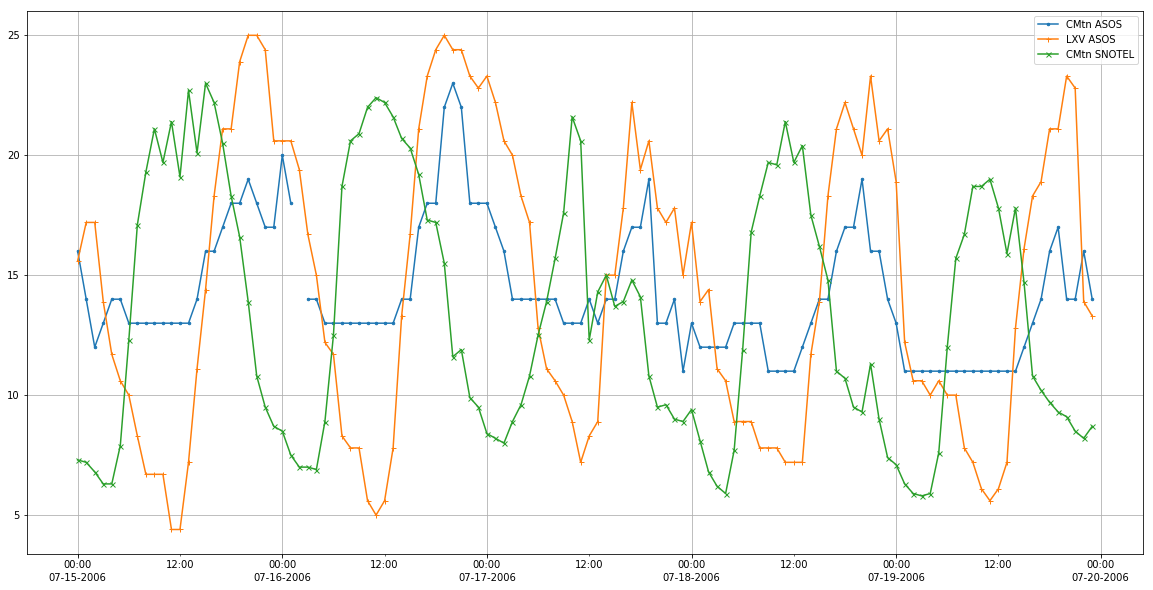

In [7]:

import matplotlib.dates as mdates
fig,ax1 = plt.subplots(figsize=(20,10))


tickv = pd.date_range('2006-07-15', periods=6, freq = 'H')

ax1.plot(asos_snotel_df['CMtn_Temperature_degC']['2006-07-15':'2006-07-19'], marker='.', markersize = 5, label = "CMtn ASOS")
ax1.plot(asos_snotel_df['LXV_Temperature_degC']['2006-07-15':'2006-07-19'], marker='+', markersize = 5, label = "LXV ASOS")
ax1.plot(asos_snotel_df['CMtnSNTL_Temp_degC']['2006-07-15':'2006-07-19'], marker='x', markersize = 5, label = "CMtn SNOTEL")
#plt.xticks(tickv)


ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('\n%m-%d-%Y')) 

ax1.grid(True)

plt.legend()
plt.show()



**Based on this graph, it looks like the warmest part of the day occurs near 22:00 UTC (3pm MST), which would be expected, for LXV and the CMtn ASOS stations.  However, the SNOTEL site appears to be shifted several hours.  This is likely due to the SNOTEL site being in MT.  THis needs to be adjusted**

In [8]:
asos_df.index = asos_df.index.tz_localize('UTC')
asos2_df.index = asos2_df.index.tz_localize('UTC')

print(snotel_df.head())
snotel_df.index = snotel_df.index.tz_localize('US/Mountain', errors = 'coerce', ambiguous = 'NaT').tz_convert('UTC')
print(snotel_df.head())
asos_snotel_df = pd.merge(pd.merge(snotel_df, asos_df,on='Date_Time'),asos2_df,on='Date_Time')


                     CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in
Date_Time                                                     
2005-01-01 00:00:00                -2.1                    NaN
2005-01-01 01:00:00                 NaN                    NaN
2005-01-01 02:00:00                 NaN                    NaN
2005-01-01 03:00:00                -4.2                    NaN
2005-01-01 04:00:00                 NaN                    NaN
                           CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in
Date_Time                                                           
2005-01-01 07:00:00+00:00                -2.1                    NaN
2005-01-01 08:00:00+00:00                 NaN                    NaN
2005-01-01 09:00:00+00:00                 NaN                    NaN
2005-01-01 10:00:00+00:00                -4.2                    NaN
2005-01-01 11:00:00+00:00                 NaN                    NaN


**Now regraph.  The results now appear to be all in UTC**

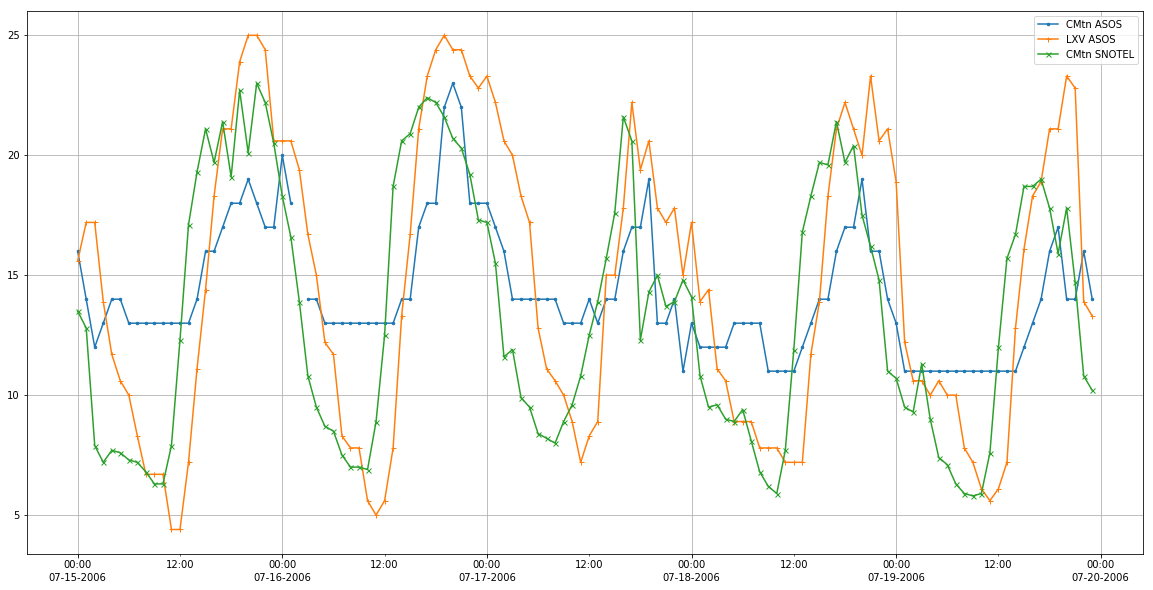

In [9]:
fig,ax1 = plt.subplots(figsize=(20,10))


tickv = pd.date_range('2006-07-15', periods=6, freq = 'H')

ax1.plot(asos_snotel_df['CMtn_Temperature_degC']['2006-07-15':'2006-07-19'], marker='.', markersize = 5, label = "CMtn ASOS")
ax1.plot(asos_snotel_df['LXV_Temperature_degC']['2006-07-15':'2006-07-19'], marker='+', markersize = 5, label = "LXV ASOS")
ax1.plot(asos_snotel_df['CMtnSNTL_Temp_degC']['2006-07-15':'2006-07-19'], marker='x', markersize = 5, label = "CMtn SNOTEL")
#plt.xticks(tickv)


ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('\n%m-%d-%Y')) 

ax1.grid(True)

plt.legend()
plt.show()



## Determining Outliers

**Let's make some box plots**

In [10]:
print(asos_snotel_df.keys())

Index(['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
       'CMtn_Dewpoint_degC', 'CMtn_Pressure_hp', 'CMtn_WindDirection_deg',
       'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas',
       'CMtn_1hr_Precipitation_mm', 'CMtn_6hr_Precipitation_mm',
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp',
       'LXV_WindDirection_deg', 'LXV_WindSpeed_mps', 'LXV_CloudCover_oktas',
       'LXV_1hr_Precipitation_mm', 'LXV_6hr_Precipitation_mm'],
      dtype='object')


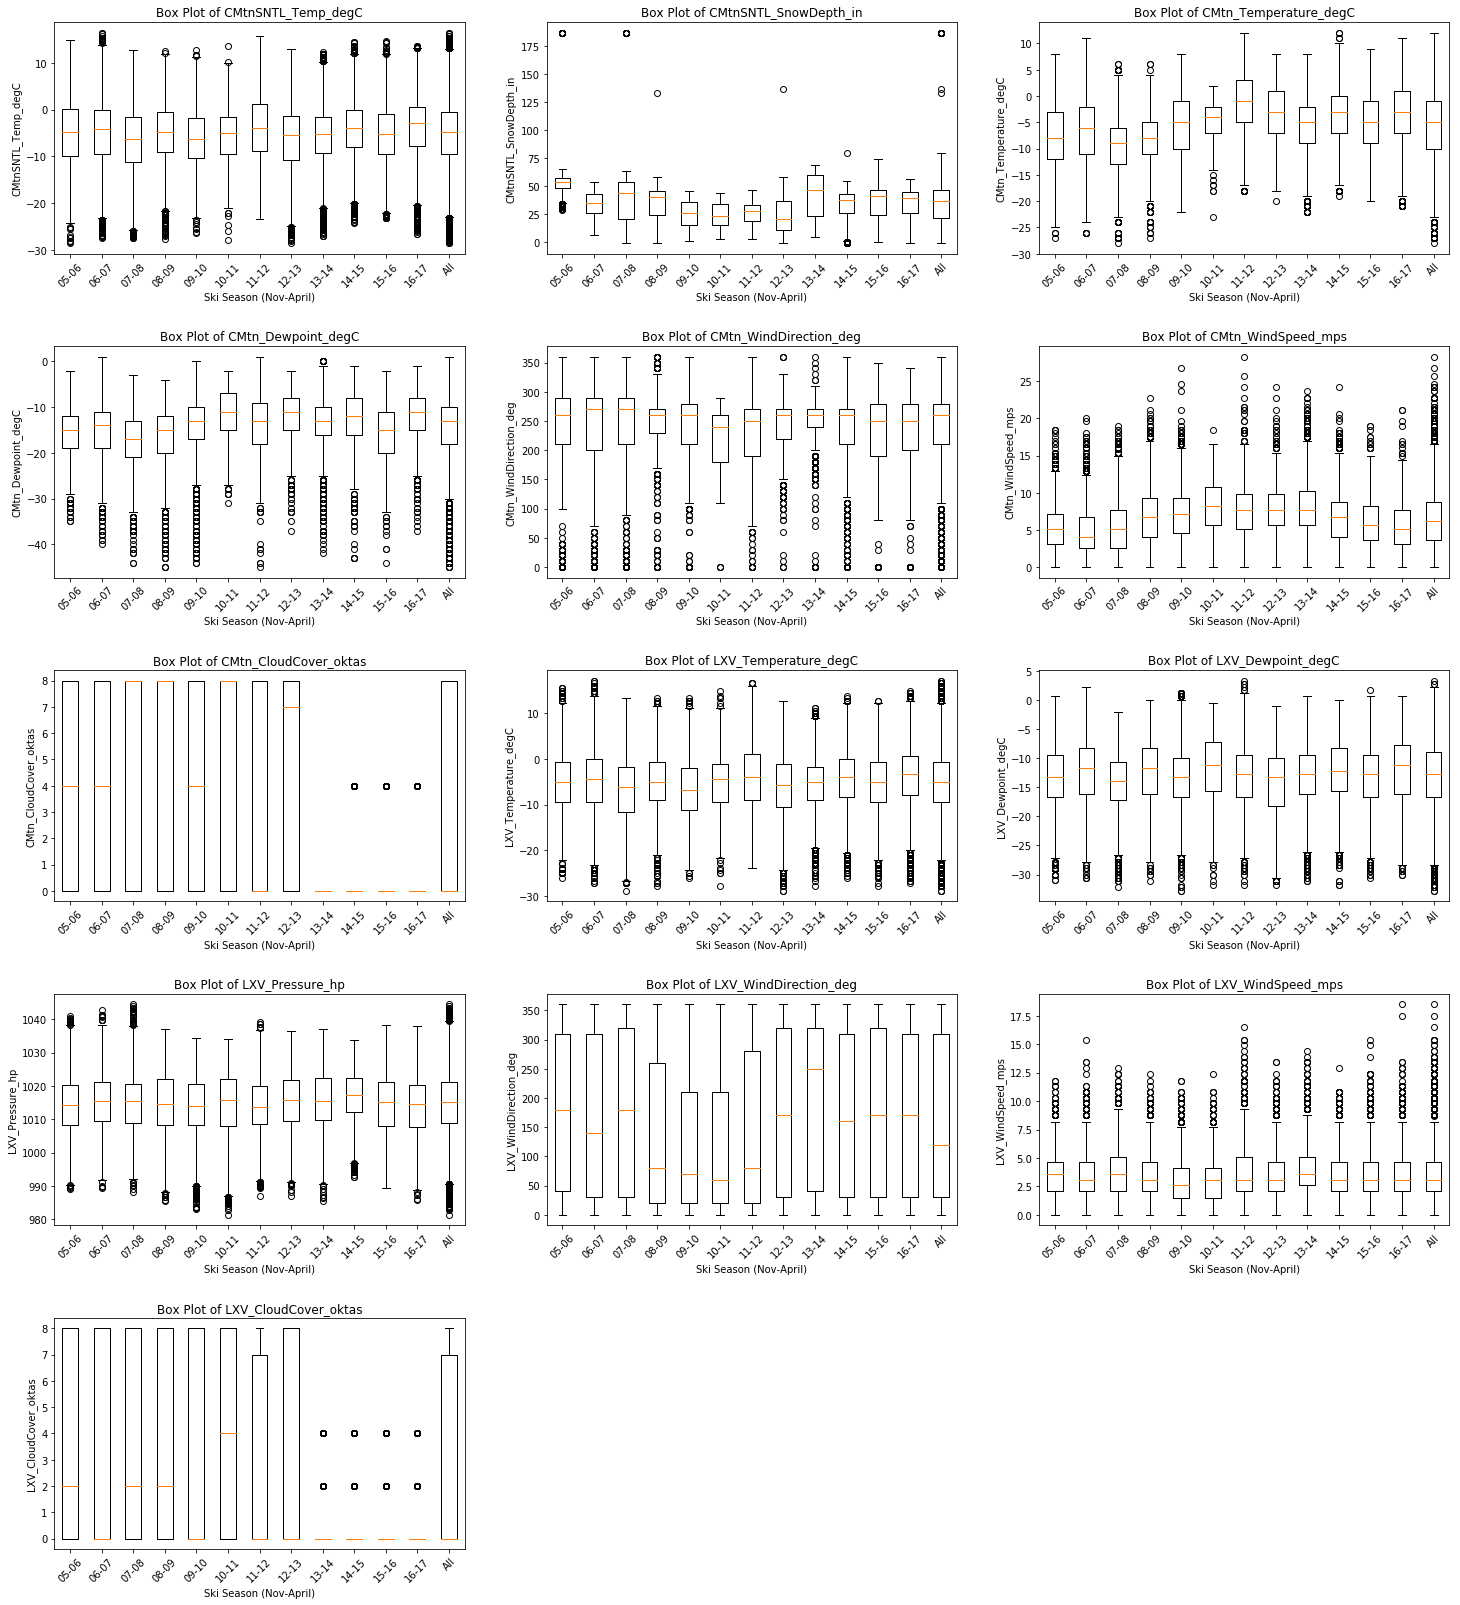

In [11]:
fig = plt.figure(figsize=(25,40))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


keys = ['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC', \
       'CMtn_Dewpoint_degC',  'CMtn_WindDirection_deg', \
       'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', \
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', \
       'LXV_WindDirection_deg', 'LXV_WindSpeed_mps', 'LXV_CloudCover_oktas']


for k in range(len(keys)):
    ax = plt.subplot(7, 3, k+1)

#fig.suptitle = 'Boxplot by Ski Season (November - April)'



    filtered_data = asos_snotel_df[keys[k]][~np.isnan(asos_snotel_df[keys[k]])]

    merged_seasons =  pd.concat([filtered_data['11-2005':'04-2006'], filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

    filtered_data2 = [filtered_data['11-2005':'04-2006'], filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]

    plot =ax.boxplot(filtered_data2)
    plt.title('Box Plot of ' + keys[k])
    labels = ['05-06', '06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
    ax.set_xticklabels(labels, rotation = 45)
    ax.set_xlabel('Ski Season (Nov-April)')
    ax.set_ylabel(keys[k])

**These box plots do illuminate some interesting data characteristics to be aware. The distributions of data seem reasonable for all variables except 2010-2011 Wind Direction,  2013-2017 Cloudcover, and 07-08, 08-09, 12-13 Snow Depth Data.  One would expect there to be winds in virtually every direction over a season; however it does not appear that happened in years 10-11.  This could be due to a large amount of data missing that year.  CloudCover seems very anommalous for years 13-17 as the only value looks to be 4 at the Copper Mtn site; and 2 & 4 at the Leadville site.  Finally, the values which fall far outside the distribution of the snow depth data are also questionable. Additional investigation will be made by looking at timeseries plots..  **

                           CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in  \
Date_Time                                                              
2006-01-01 01:00:00+00:00                -1.3                   43.0   
2006-01-01 02:00:00+00:00                -2.7                   43.0   
2006-01-01 03:00:00+00:00                -2.6                   43.0   
2006-01-01 04:00:00+00:00                -2.5                   43.0   
2006-01-01 05:00:00+00:00                -3.2                   42.0   

                           CMtn_Temperature_degC  CMtn_Dewpoint_degC  \
Date_Time                                                              
2006-01-01 01:00:00+00:00                   -1.0                -7.0   
2006-01-01 02:00:00+00:00                   -3.0                -8.0   
2006-01-01 03:00:00+00:00                   -4.0                -8.0   
2006-01-01 04:00:00+00:00                   -4.0                -9.0   
2006-01-01 05:00:00+00:00                   -5.0               

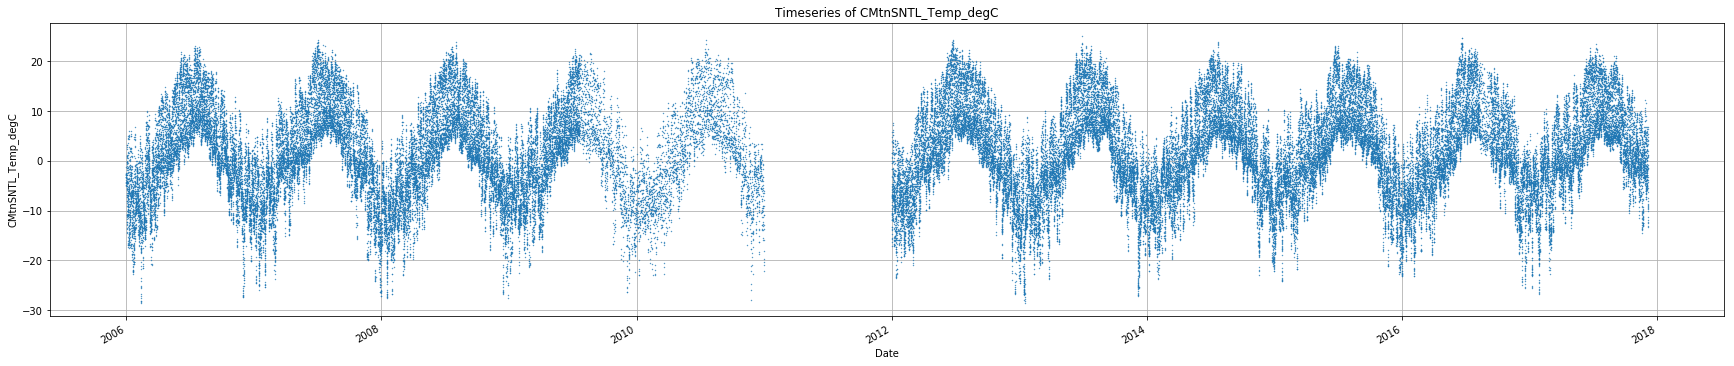

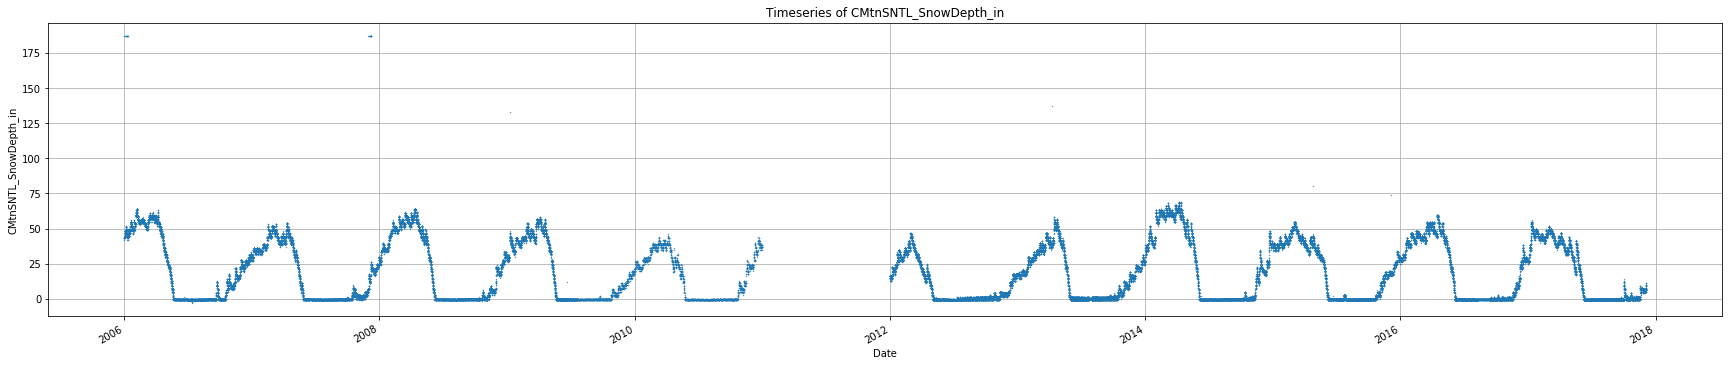

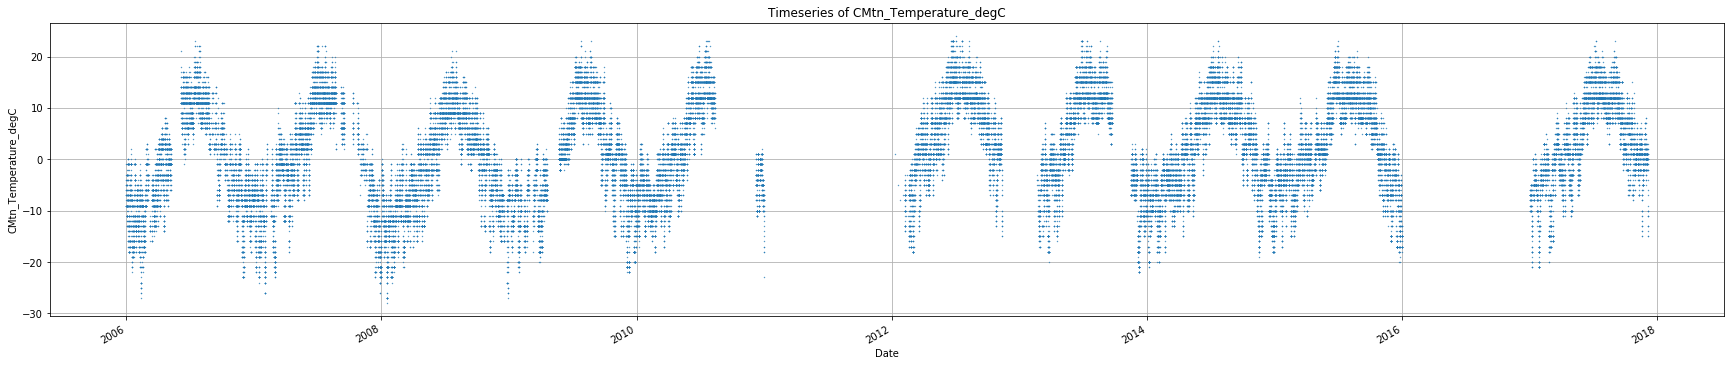

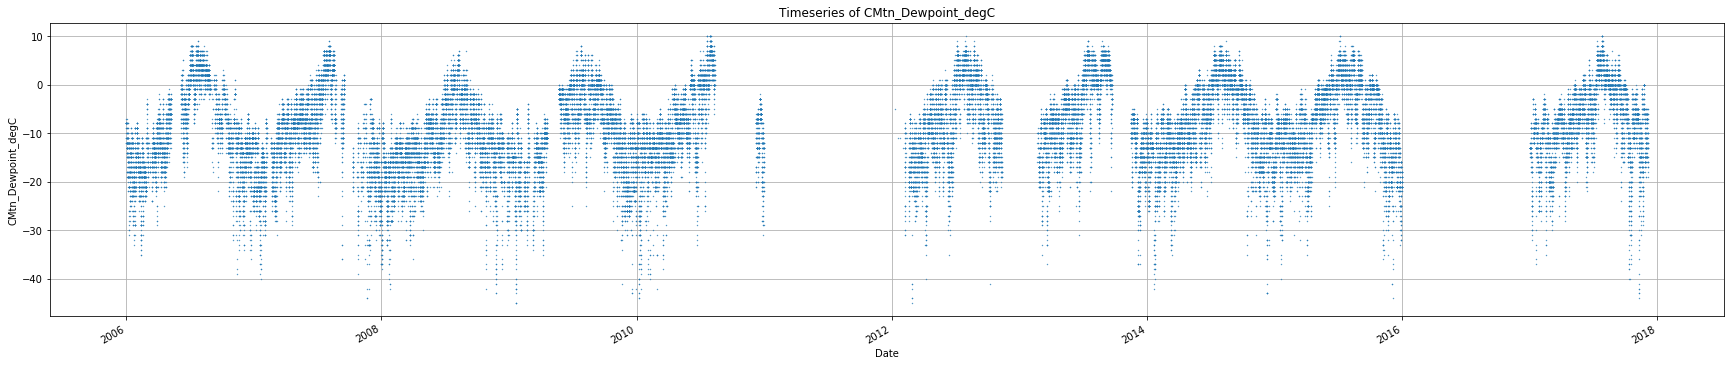

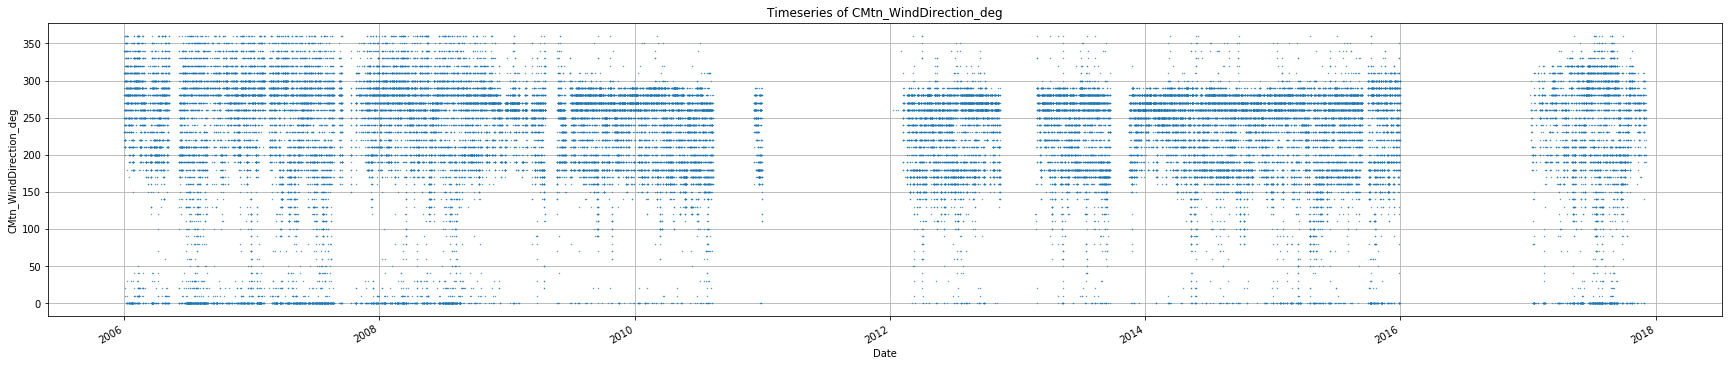

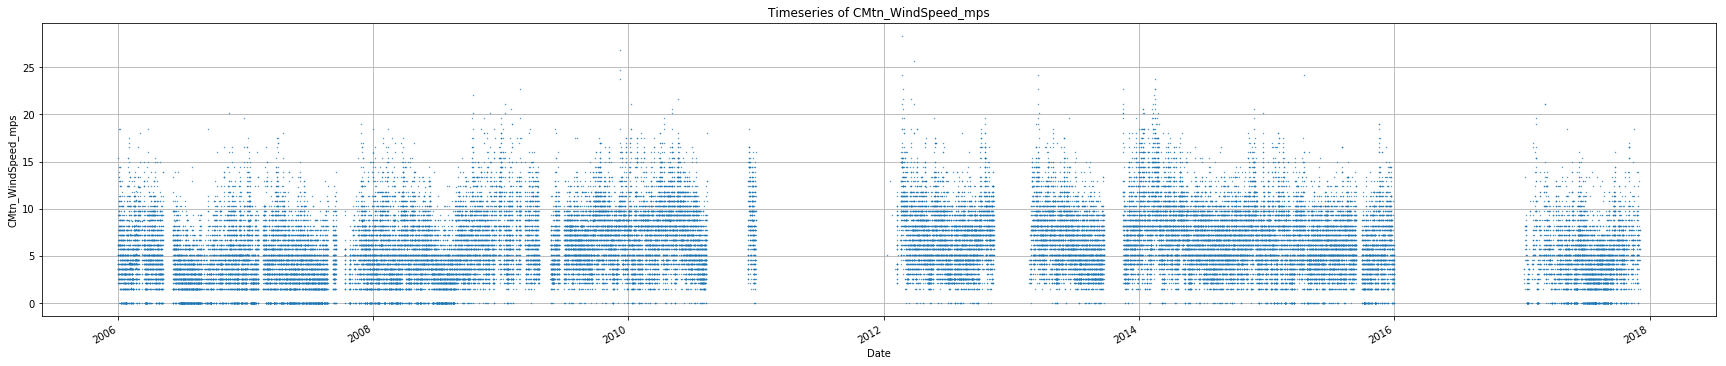

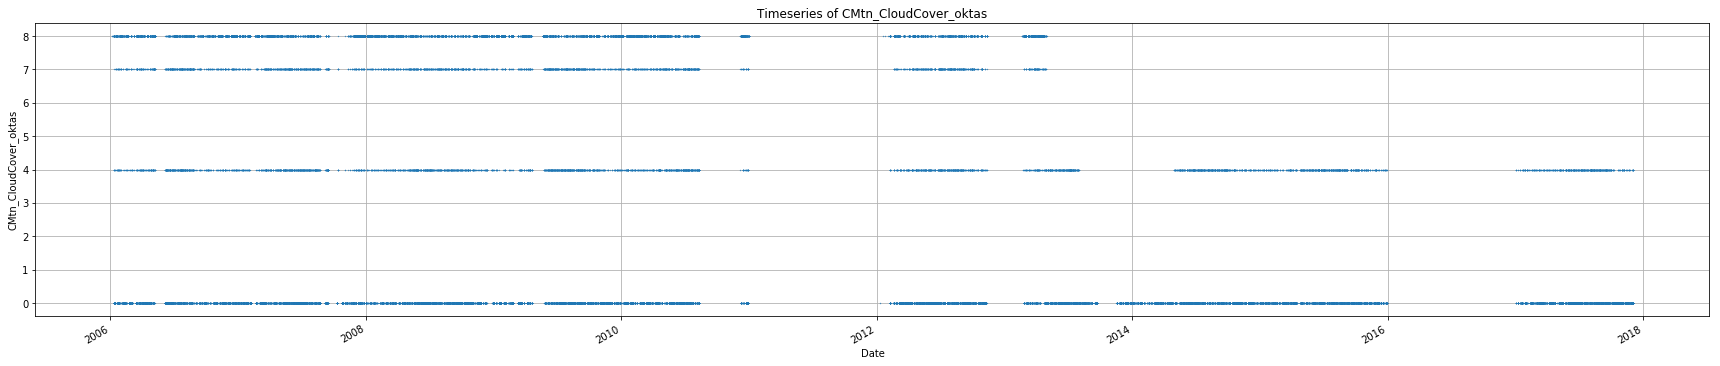

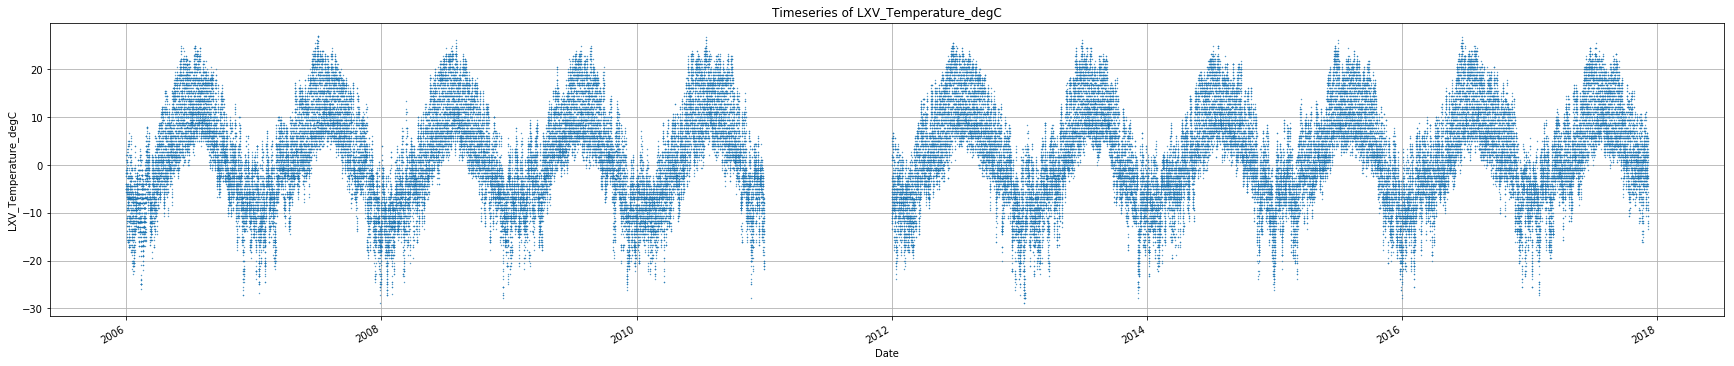

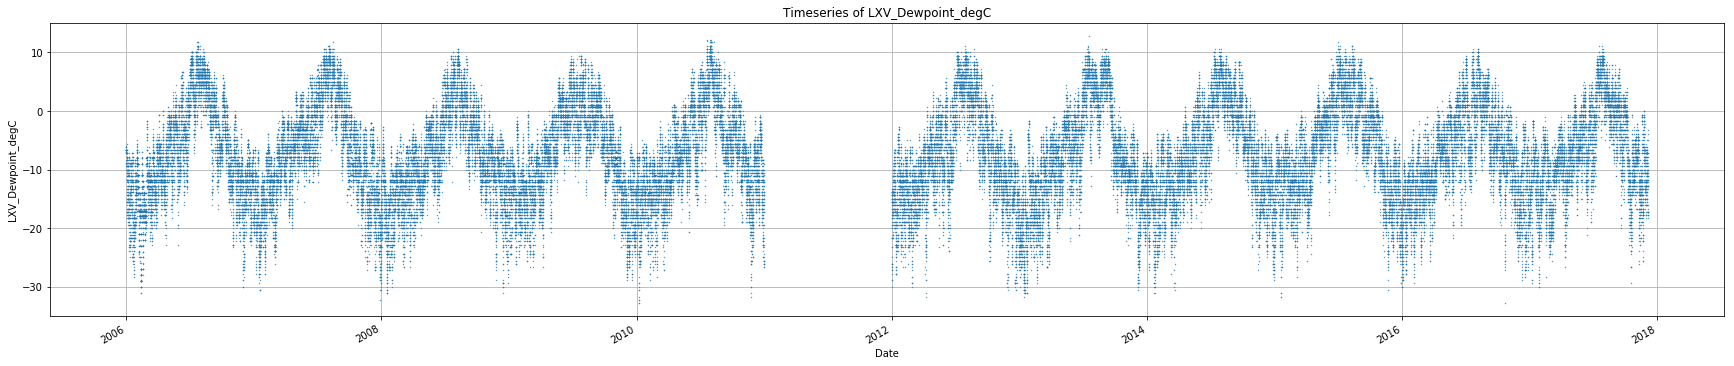

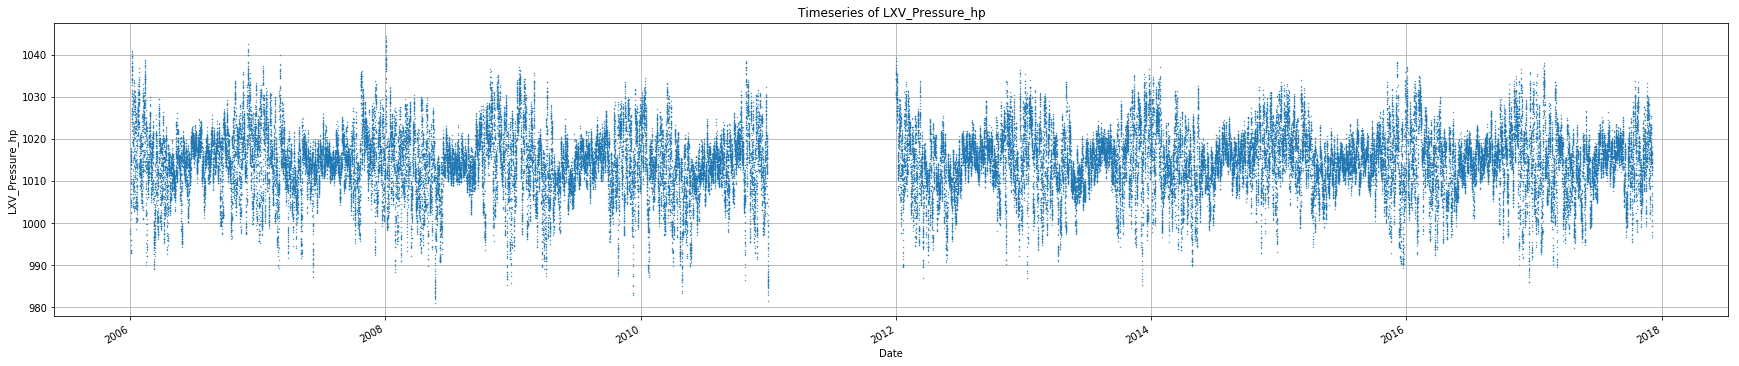

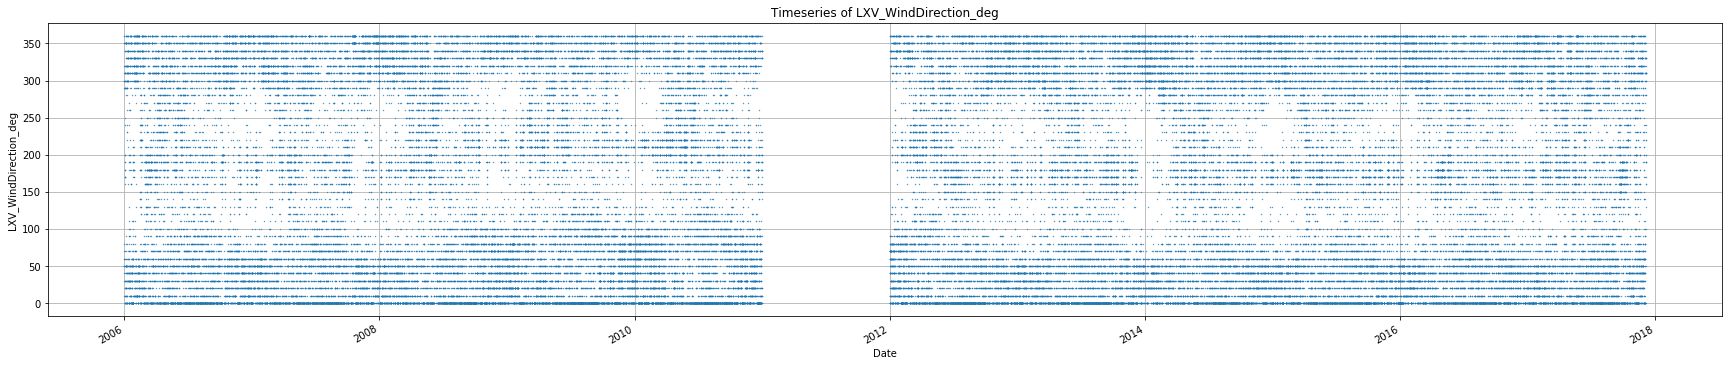

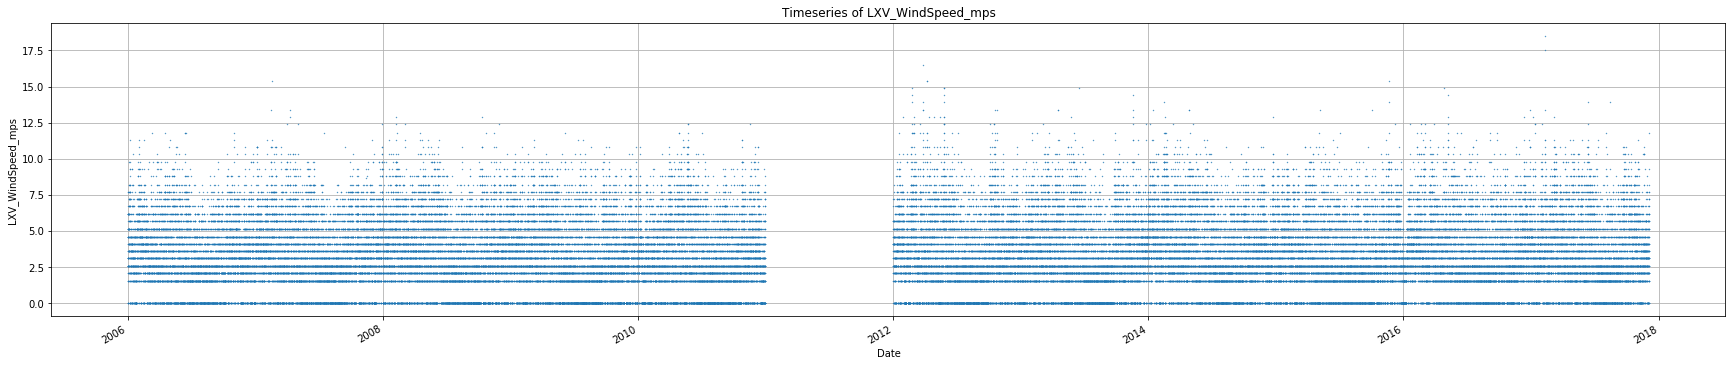

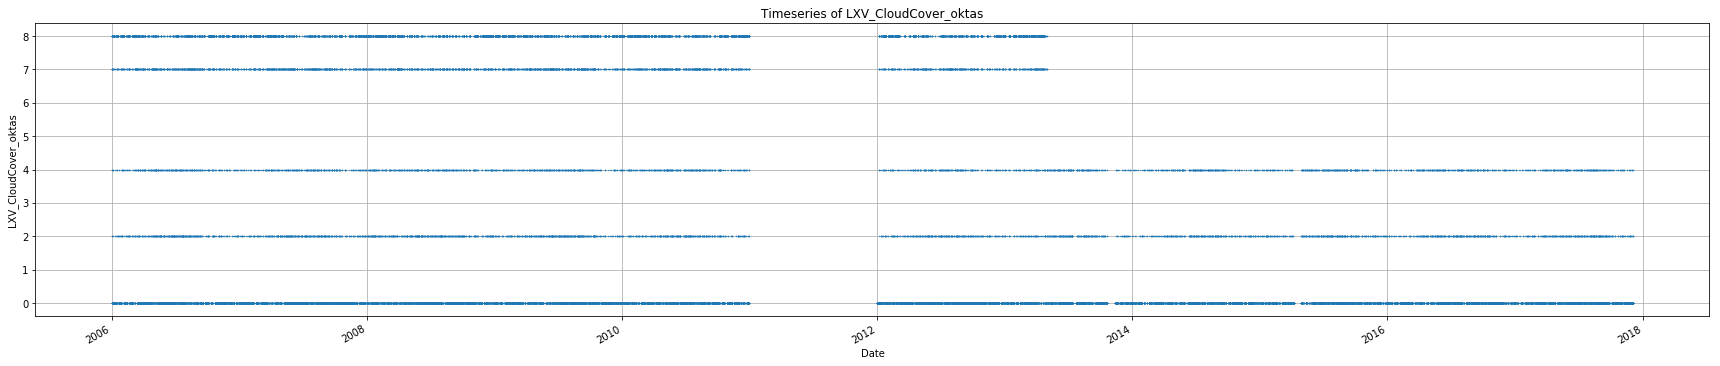

In [12]:
ax = None

print(asos_snotel_df.head())

#keys = ['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in']

#keys = ['CMtn_Pressure_hp']


#fig.subplots_adjust(hspace=0.3, wspace=0.1)
for k in range(len(keys)):
    fig = plt.figure(figsize=(30,6))
    #ax = plt.subplot(15, 1, k+1)
    ax = None
    ax = asos_snotel_df[keys[k]]['2005':'2017'].plot(linestyle='None', ax = ax, marker = ".", markersize = 0.75)
    ax.set_xlabel("Date")
    ax.set_ylabel(keys[k])
    
    plt.title("Timeseries of " + keys[k])
 
    plt.grid()
    plt.axis('tight')
    
    plt.show()
    
    fig.clf()
    plt.close()
  

#plt.show()



**Cloud cover data is very suspicious beginning in year 2013, so all data after that point will be removed at both the Copper Mountain and the Leadville site**

In [13]:
asos_snotel_df['CMtn_CloudCover_oktas']['2013':'2017'] = np.NaN
asos_snotel_df['LXV_CloudCover_oktas']['2013':'2017'] = np.NaN

**Lets take a look at total snow depths by year**

In [14]:
years = ['2006', '2007', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

for y in years:
    print("Year: "+ y + " - Snow Depth Max: " + str(round(asos_snotel_df['CMtnSNTL_SnowDepth_in'][y].max(),2)) + " - Snow Depth Min: " + str(round(asos_snotel_df['CMtnSNTL_SnowDepth_in'][y].min(),2)))


Year: 2006 - Snow Depth Max: 187.0 - Snow Depth Min: -3.0
Year: 2007 - Snow Depth Max: 187.0 - Snow Depth Min: -1.0
Year: 2007 - Snow Depth Max: 187.0 - Snow Depth Min: -1.0
Year: 2008 - Snow Depth Max: 64.0 - Snow Depth Min: -1.0
Year: 2009 - Snow Depth Max: 133.0 - Snow Depth Min: -1.0
Year: 2010 - Snow Depth Max: 46.0 - Snow Depth Min: -1.0
Year: 2011 - Snow Depth Max: nan - Snow Depth Min: nan
Year: 2012 - Snow Depth Max: 47.0 - Snow Depth Min: -1.0
Year: 2013 - Snow Depth Max: 137.0 - Snow Depth Min: -1.0
Year: 2014 - Snow Depth Max: 69.0 - Snow Depth Min: -1.0
Year: 2015 - Snow Depth Max: 80.0 - Snow Depth Min: -1.0
Year: 2016 - Snow Depth Max: 60.0 - Snow Depth Min: -1.0
Year: 2017 - Snow Depth Max: 56.0 - Snow Depth Min: -1.0


**It can be seen from the snow depth plot there are various spikes in the dataset which are physically unrealistic.  Therefore, snowdepth values >100 will be thrown out, along with snowdepth values greater then 70 in year 2015.  Also, snow depth values less then -100 will be eliminated: **

In [15]:
plt.figure(figsize=(15,5))

xx=(asos_snotel_df['CMtnSNTL_SnowDepth_in']<-100) | (asos_snotel_df['CMtnSNTL_SnowDepth_in']>100) | (asos_snotel_df['CMtnSNTL_SnowDepth_in']['2015']>70)
asos_snotel_df['CMtnSNTL_SnowDepth_in'][xx]=np.NaN
#snotel_filled_df = snotel_df.interpolate(limit=3)


<Figure size 1080x360 with 0 Axes>

**Taking a look at the snow depth box plot after cleaned up**

Text(0,0.5,'Snow Depth (inches)')

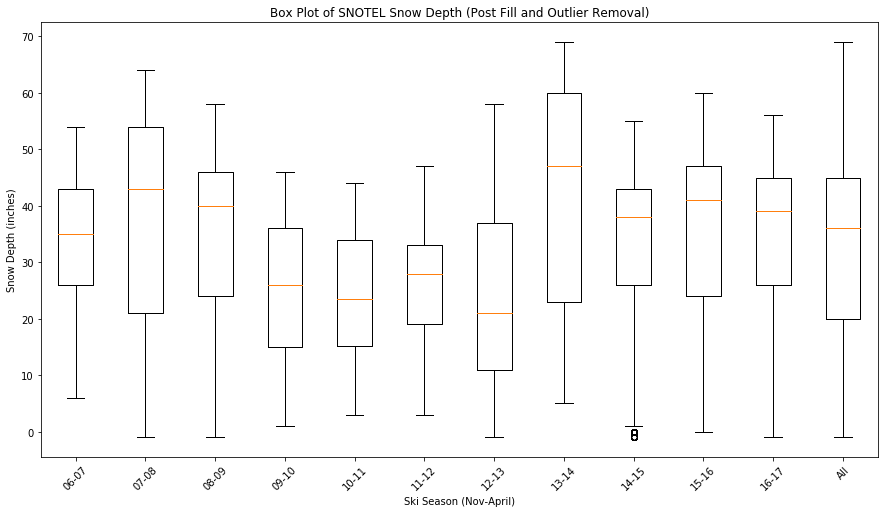

In [16]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = asos_snotel_df['CMtnSNTL_SnowDepth_in'][~np.isnan(asos_snotel_df['CMtnSNTL_SnowDepth_in'])]


merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

filtered_data2 = [filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]

plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Snow Depth (Post Fill and Outlier Removal)')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (inches)')

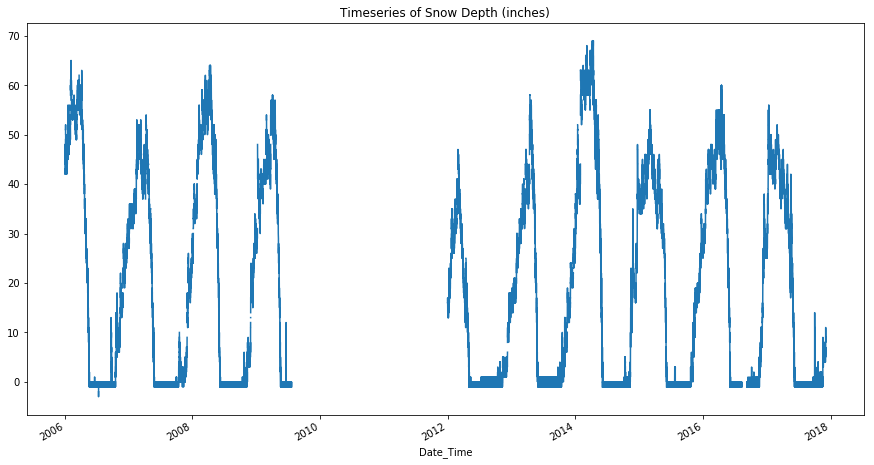

Date_Time
2006-01-01 01:00:00+00:00    43.0
2006-01-01 02:00:00+00:00    43.0
2006-01-01 03:00:00+00:00    43.0
2006-01-01 04:00:00+00:00    43.0
2006-01-01 05:00:00+00:00    42.0
2006-01-01 06:00:00+00:00    43.0
2006-01-01 07:00:00+00:00    43.0
2006-01-01 08:00:00+00:00    43.0
2006-01-01 09:00:00+00:00     NaN
2006-01-01 10:00:00+00:00    43.0
2006-01-01 11:00:00+00:00    43.0
2006-01-01 12:00:00+00:00    43.0
2006-01-01 13:00:00+00:00    44.0
2006-01-01 14:00:00+00:00    44.0
2006-01-01 15:00:00+00:00    44.0
2006-01-01 16:00:00+00:00    43.0
2006-01-01 17:00:00+00:00    47.0
2006-01-01 18:00:00+00:00    48.0
2006-01-01 19:00:00+00:00    48.0
2006-01-01 20:00:00+00:00    48.0
2006-01-01 21:00:00+00:00    48.0
2006-01-01 22:00:00+00:00    47.0
2006-01-01 23:00:00+00:00    48.0
2006-01-02 00:00:00+00:00    48.0
2006-01-02 01:00:00+00:00    48.0
2006-01-02 02:00:00+00:00    48.0
2006-01-02 03:00:00+00:00    48.0
2006-01-02 04:00:00+00:00    48.0
2006-01-02 05:00:00+00:00    48.0
2006

In [17]:
fig2 = plt.figure(figsize=(15,8))

asos_snotel_df['CMtnSNTL_SnowDepth_in']['2005':'2017'].plot(linewidth=None,  markersize = 0.00001)
ax.set_xlabel("Date")
ax.set_ylabel('CMtnSNTL_SnowDepth_in')
plt.title("Timeseries of Snow Depth (inches)")
  

plt.show()
print(asos_snotel_df['CMtnSNTL_SnowDepth_in']['2006'])

### Interpolate missing values up to 3 hours

In [18]:
print(asos_snotel_df.info())
asos_snotel_fill_df = asos_snotel_df.copy()

asos_snotel_df = asos_snotel_df.interpolate(how = 'linear', limit = 3)

print('*********************')
print(asos_snotel_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95421 entries, 2006-01-01 01:00:00+00:00 to 2017-12-04 23:00:00+00:00
Data columns (total 18 columns):
CMtnSNTL_Temp_degC           86428 non-null float64
CMtnSNTL_SnowDepth_in        75582 non-null float64
CMtn_Temperature_degC        70127 non-null float64
CMtn_Dewpoint_degC           69999 non-null float64
CMtn_Pressure_hp             0 non-null float64
CMtn_WindDirection_deg       65183 non-null float64
CMtn_WindSpeed_mps           65183 non-null float64
CMtn_CloudCover_oktas        38544 non-null float64
CMtn_1hr_Precipitation_mm    964 non-null float64
CMtn_6hr_Precipitation_mm    0 non-null float64
LXV_Temperature_degC         95396 non-null float64
LXV_Dewpoint_degC            95394 non-null float64
LXV_Pressure_hp              92887 non-null float64
LXV_WindDirection_deg        88888 non-null float64
LXV_WindSpeed_mps            95164 non-null float64
LXV_CloudCover_oktas         50927 non-null float64
LXV_1hr_Precipitation_

### Create 12 hr snowfall dataframe by using 12hr snowdepth difference

In [19]:
import matplotlib.dates as mdates
#fig = plt.figure(figsize=(10,5))


#Calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
asos_snotel_df['CMtnSNTL_12hr_SNWD_in'] = asos_snotel_df['CMtnSNTL_SnowDepth_in'].resample('12H').first()
asos_snotel_df['CMtnSNTL_12hr-dSNWD_in'] = asos_snotel_df['CMtnSNTL_12hr_SNWD_in']-asos_snotel_df['CMtnSNTL_12hr_SNWD_in'].shift(+12)
asos_snotel_df['CMtnSNTL_Past12hrSNOWFALL_in'] = asos_snotel_df['CMtnSNTL_12hr-dSNWD_in']
asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_in'] = asos_snotel_df['CMtnSNTL_12hr-dSNWD_in'].shift(-12)


asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'] = asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_in'][asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_in']>=3]
asos_snotel_df['CMtnSNTL_Past12hrSNOWFALL_gte3_in'] = asos_snotel_df['CMtnSNTL_Past12hrSNOWFALL_in'][asos_snotel_df['CMtnSNTL_Past12hrSNOWFALL_in']>=3]

print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_in'].describe())
print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].describe())


#fig = plt.figure(figsize=(30,15))
#plt.subplot(2,1, 1)
#plt.subplots_adjust(hspace=0.5, wspace=0.2)

count    7801.000000
mean       -0.000755
std         1.392612
min        -6.500000
25%        -1.000000
50%         0.000000
75%         0.000000
max        16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_in, dtype: float64
count    298.000000
mean       4.644407
std        2.211180
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in, dtype: float64


Let's check to verify we are doing what we think we are.  First plot snowfall values

count    298.000000
mean       4.644407
std        2.211180
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in, dtype: float64


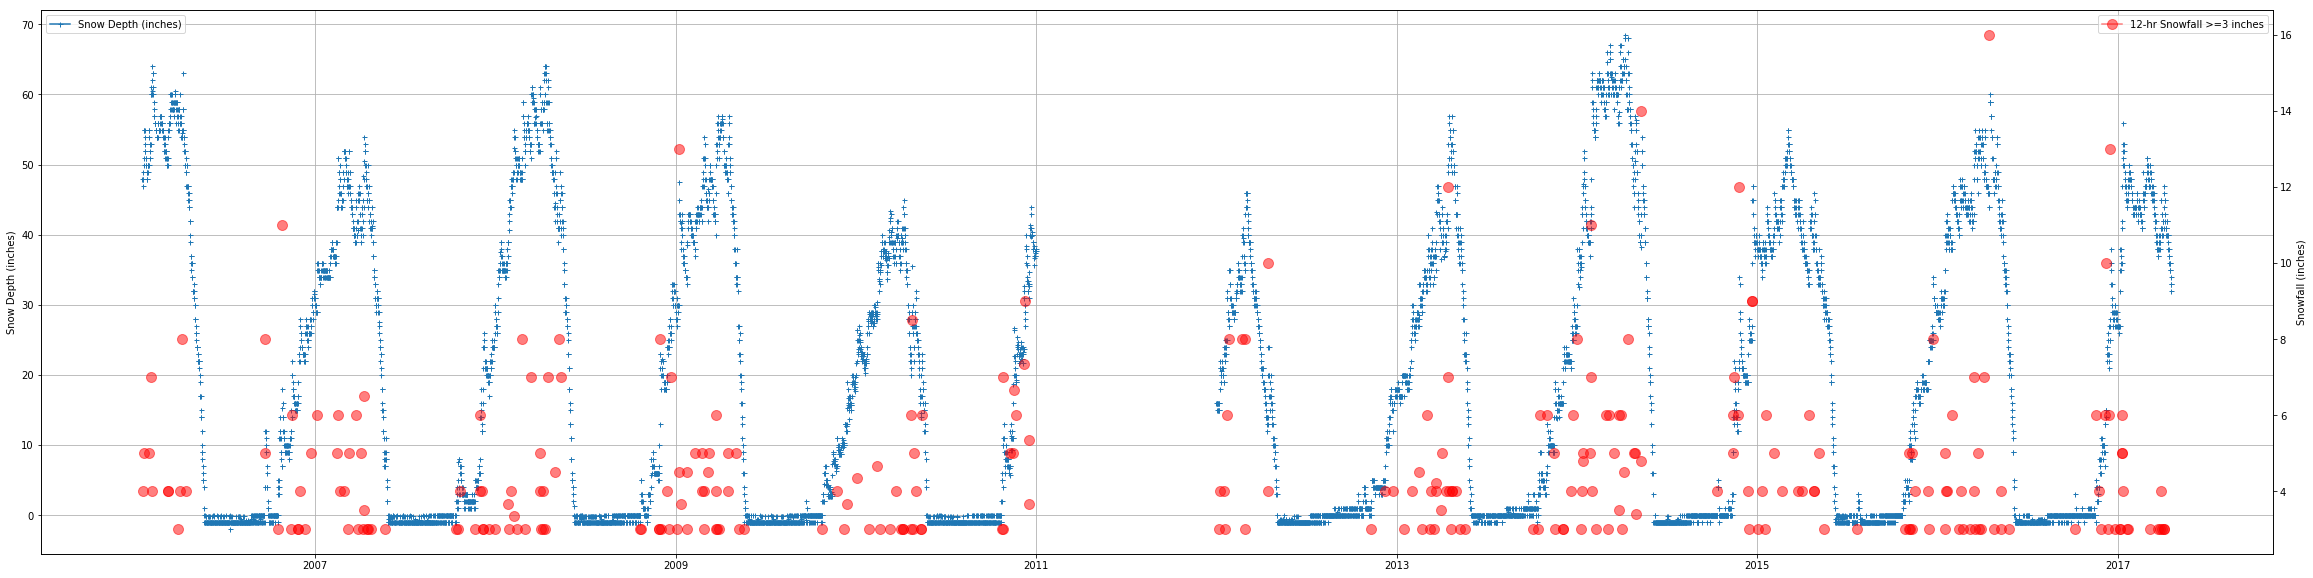

In [47]:
fig, ax1 = plt.subplots(figsize=(40,10))
ax2 = ax1.twinx()
#ax1.plot(asos_snotel_UA_df['CMtnSNTL_SnowDepth_in']['04-16-2009':'04-19-2009'], marker='.', markersize = 10, label = "1hr Snow Depth")

ax1.plot(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['01-16-2006':'04-19-2017'], marker='+', markersize = 5, label = "Snow Depth (inches)")
ax2.plot(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['01-16-2006':'04-19-2017'], marker='.', markersize = 20, alpha = 0.5,  label = "12-hr Snowfall >=3 inches" , color = 'r')
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_ylabel('Snow Depth (inches)')
ax2.set_ylabel('Snowfall (inches)')
print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].describe())
fig.savefig(r'C:\Users\RAPP\Documents\Capstone\Projects\milestone_capstone_figs\snowdepth_snowfall.png')


In [38]:
from tabulate import tabulate
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2015', '2016', '2017']
counts = []
means = []
maxes = []
for year in years:
    counts.append(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][year].count())
    maxes.append(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][year].max())
    means.append(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][year].mean())

tbl = zip(years, counts, means, maxes)  
    
print(tabulate(tbl, headers=['Year', 'Number 12hr Snowfall Events >=3', 'Mean', 'Max'], tablefmt='github'))



|   Year |   Number 12hr Snowfall Events >=3 |      Mean |   Max |
|--------|-----------------------------------|-----------|-------|
|   2006 |                                25 |   4.8     |  11   |
|   2007 |                                28 |   3.96429 |   6.5 |
|   2008 |                                27 |   4.46296 |   8   |
|   2009 |                                27 |   4.25309 |  13   |
|   2010 |                                29 |   4.60345 |   9   |
|   2011 |                                 0 | nan       | nan   |
|   2012 |                                14 |   5.14286 |  10   |
|   2013 |                                32 |   4.2875  |  12   |
|   2015 |                                24 |   4.125   |   8   |
|   2016 |                                31 |   4.93548 |  16   |
|   2017 |                                26 |   4.61538 |  16   |


Text(0,0.5,'Snow Depth (inches)')

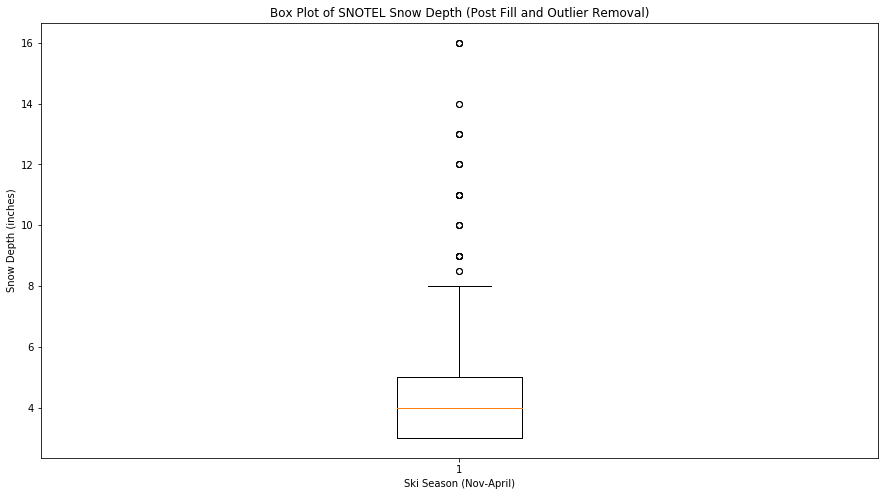

In [52]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)


filtered_data = asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][~np.isnan(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'])]


merged =  pd.concat([filtered_data['2006'], filtered_data['2007'], \
                 filtered_data['2008'],filtered_data['2009'],filtered_data['2010'], \
                 filtered_data['2011'],filtered_data['2012'],filtered_data['2013'], \
                 filtered_data['2014'],filtered_data['2015'],filtered_data['2016'],filtered_data['2017']], axis = 0)

data =  pd.concat([filtered_data['2006'], filtered_data['2007'], \
                 filtered_data['2008'],filtered_data['2009'],filtered_data['2010'], \
                 filtered_data['2011'],filtered_data['2012'],filtered_data['2013'], \
                 filtered_data['2014'],filtered_data['2015'],filtered_data['2016'],filtered_data['2017'], merged], axis = 0)

plot =ax.boxplot(data)
plt.title('Box Plot of SNOTEL Snow Depth (Post Fill and Outlier Removal)')
#labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
#ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (inches)')

count    298.000000
mean       4.644407
std        2.211180
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in, dtype: float64


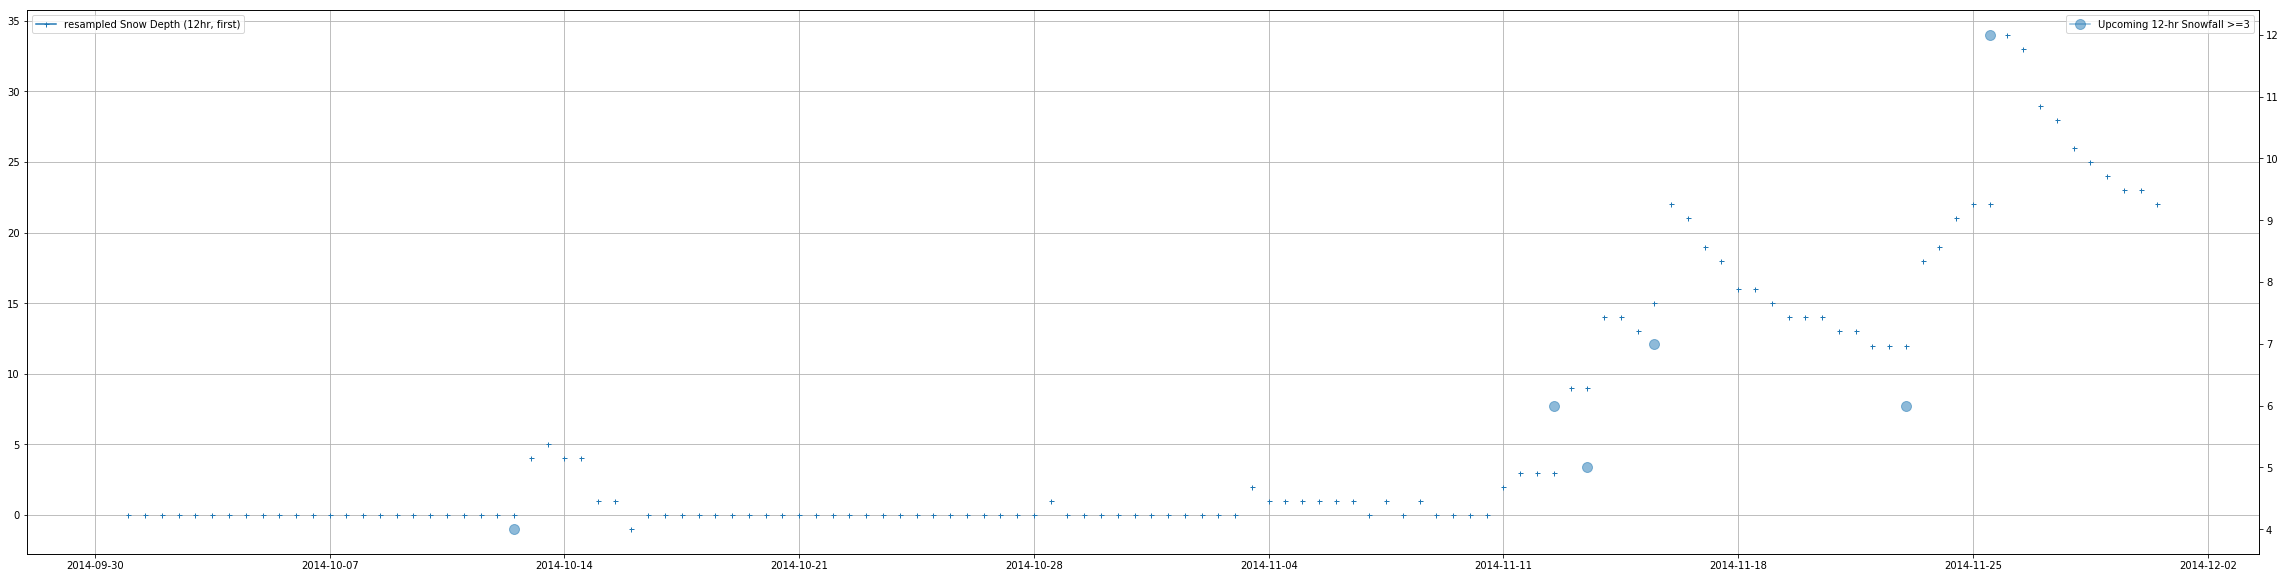

In [22]:
fig, ax1 = plt.subplots(figsize=(40,10))
ax2 = ax1.twinx()
#ax1.plot(asos_snotel_UA_df['CMtnSNTL_SnowDepth_in']['04-16-2009':'04-19-2009'], marker='.', markersize = 10, label = "1hr Snow Depth")

ax1.plot(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['10-01-2014':'11-30-2014'], marker='+', markersize = 5, label = "resampled Snow Depth (12hr, first)")
ax2.plot(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['10-01-2014':'11-30-2014'], marker='.', markersize = 20, alpha = 0.5,  label = "Upcoming 12-hr Snowfall >=3")
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].describe())

count    298.000000
mean       4.644407
std        2.211180
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in, dtype: float64


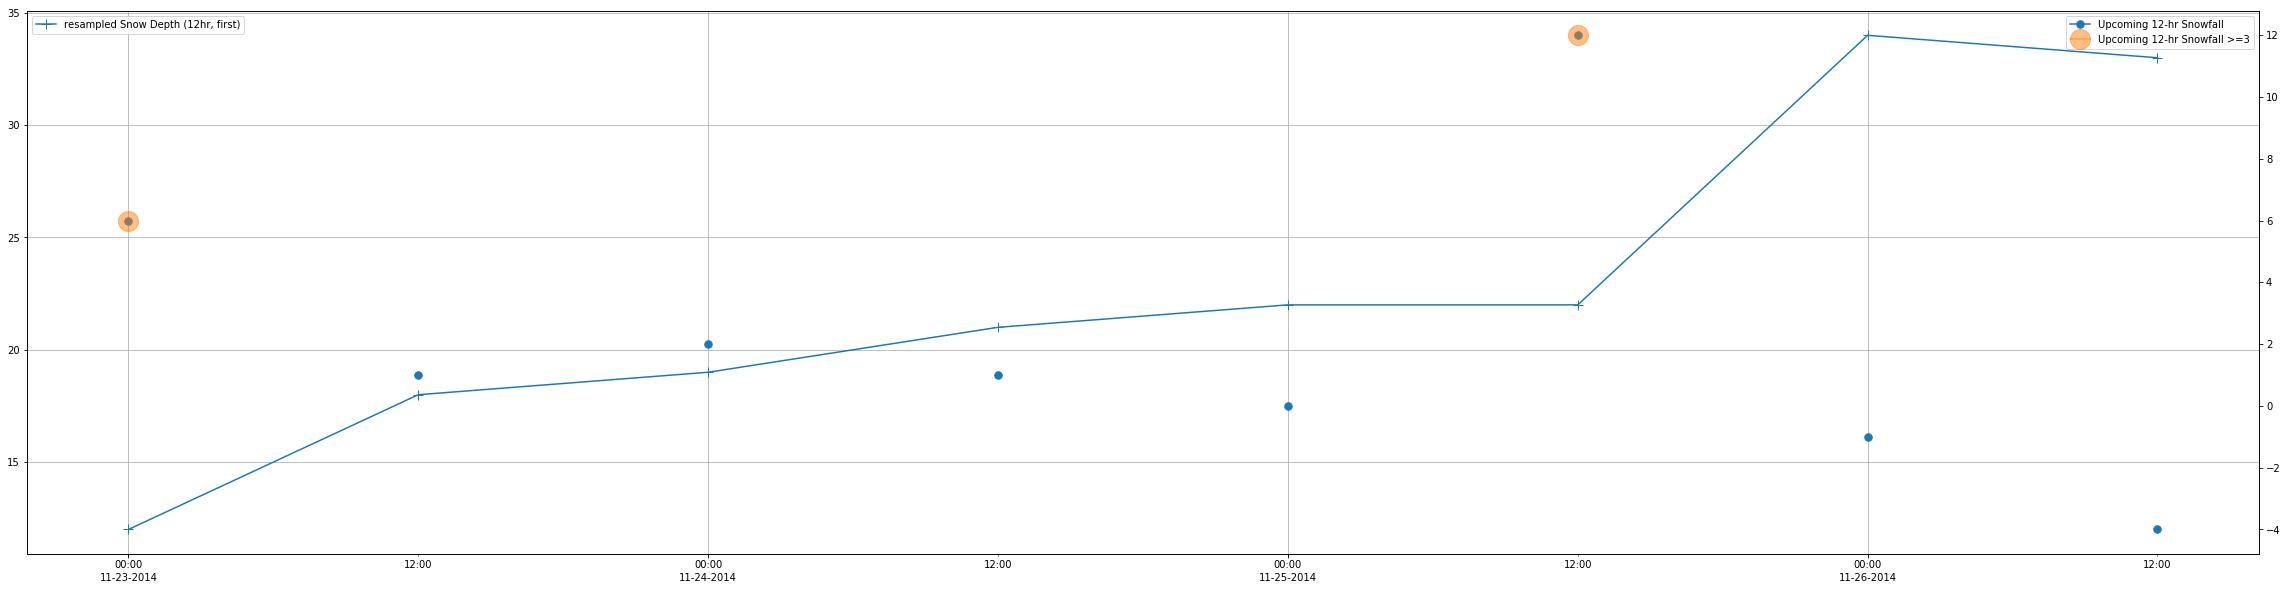

In [23]:
fig, ax1 = plt.subplots(figsize=(40,10))
ax2 = ax1.twinx()
#ax1.plot(asos_snotel_UA_df['CMtnSNTL_SnowDepth_in']['04-16-2009':'04-19-2009'], marker='.', markersize = 10, label = "1hr Snow Depth")

ax1.plot(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['11-23-2014':'11-26-2014'].dropna(), marker='+', markersize = 10, linestyle='-', label = "resampled Snow Depth (12hr, first)")
#ax1.plot(asos_snotel_df['CMtnSNTL_12hr_SNWD_in']['11-23-2014':'11-26-2014'].shift(+1), marker='+',linestyle='-', markersize = 10 label = "shifted +12hr")
#ax2.plot(asos_snotel_df['CMtnSNTL_Past12hrSNOWFALL_in']['11-23-2014':'11-26-2014'], marker='x', markersize = 15,  label = "Past 12-hr Snowfall")
ax2.plot(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_in']['11-23-2014':'11-26-2014'], marker='.', markersize = 15,  label = "Upcoming 12-hr Snowfall")
ax2.plot(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['11-23-2014':'11-26-2014'], marker='.', markersize = 40, alpha = 0.5,  label = "Upcoming 12-hr Snowfall >=3")

#ax2 = asos_snotel_UA_df['CMtn_1hr_Precipitation_mm']['01-06-2009':'01-09-2009'].plot(marker='+', markersize = 10, secondary_y = True)

ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))  # hours and minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('\n%m-%d-%Y')) 
#ax00.set_xlim(100, 12)

#plt.plot(shifted_df, linestyle = '-', linewidth = 10)
#print(shifted_df.describe)

#xlabel('Item (s)')
#ylabel('Value')
#title('Python Line Chart: Plotting numbers')

#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
ax1.grid(True)
#ax2.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



#print(asos_snotel_df['12hr-dSNWD_in'].describe())
print(asos_snotel_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'].describe())

It is important to keep in mind that 'CMtnSNTL_12hr_SNWD_in contains snow depth info taken at the start of the respective 12hr period timestamp.  The snowfall calculated also gives the snowfall that fell in the 12hrs after the timestamp.  The OLS model will utilize hourly meteorological measurements at exactly 00:00 and 12:00 hours to predict the amount of snow which will fall in the next 12 hour period.  For example, the 00:00 meteorological measurements will be used to predict the snow which fell between 00:00 and 12:00.

**Include a delta Pressure variable**

In [24]:
asos_snotel_df['LXV_12hr_delta_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+12)
print(asos_snotel_df['LXV_12hr_delta_Pressure_hp'].describe())

count    94613.000000
mean         0.001444
std          4.503532
min        -21.400000
25%         -2.700000
50%         -0.200000
75%          2.300000
max         33.000000
Name: LXV_12hr_delta_Pressure_hp, dtype: float64


In [25]:
asos_snotel_df.to_csv('asos_snotel_clean_w_LXV.dat',sep = ',', float_format = '%.2f')